# Fig.1a Visualization of the combined graph of China USA and Europe

In [2]:
import geopandas as gpd

# Define file paths
china_city_geojson = '中国_市.geojson'
us_counties_geojson = 'counties.geojson'
eu_nuts_geojson = 'NUTS_RG_20M_2021_4326.geojson'

# Read GeoJSON files
gdf_china = gpd.read_file(china_city_geojson, engine='pyogrio')
gdf_us = gpd.read_file(us_counties_geojson, engine='pyogrio')
gdf_eu = gpd.read_file(eu_nuts_geojson, engine='pyogrio')

# Print the first few rows and coordinate reference system (CRS) for each GeoDataFrame
print("china_city.geojson head and CRS:")
print(gdf_china.head())
print(gdf_china.crs)

print("\nus_counties.geojson head and CRS:")
print(gdf_us.head())
print(gdf_us.crs)

print("\neu_nuts.geojson head and CRS:")
print(gdf_eu.head())
print(gdf_eu.crs)

中国_市.geojson 标签和 CRS:
  name         gb                                           geometry
0  梅州市  156441400  MULTIPOLYGON (((115.88406 24.92896, 115.89031 ...
1  鄂州市  156420700  MULTIPOLYGON (((114.83199 30.56780, 114.82968 ...
2  吕梁市  156141100  MULTIPOLYGON (((111.20539 38.72164, 111.20739 ...
3  舟山市  156330900  MULTIPOLYGON (((122.25205 29.69094, 122.23385 ...
4  朝阳市  156211300  MULTIPOLYGON (((119.60020 42.27468, 119.60812 ...
EPSG:4490

counties.geojson 标签和 CRS:
  STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID           NAME LSAD  \
0      06      075  00277302  0500000US06075  06075  San Francisco   06   
1      25      025  00606939  0500000US25025  25025        Suffolk   06   
2      31      007  00835826  0500000US31007  31007         Banner   06   
3      37      181  01008591  0500000US37181  37181          Vance   06   
4      48      421  01383996  0500000US48421  48421        Sherman   06   

        ALAND     AWATER                                           geometry 

# Heat map of charging station data

C:\Users\ZF\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Windows\Temp\ipykernel_19744\3427313068.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS direc

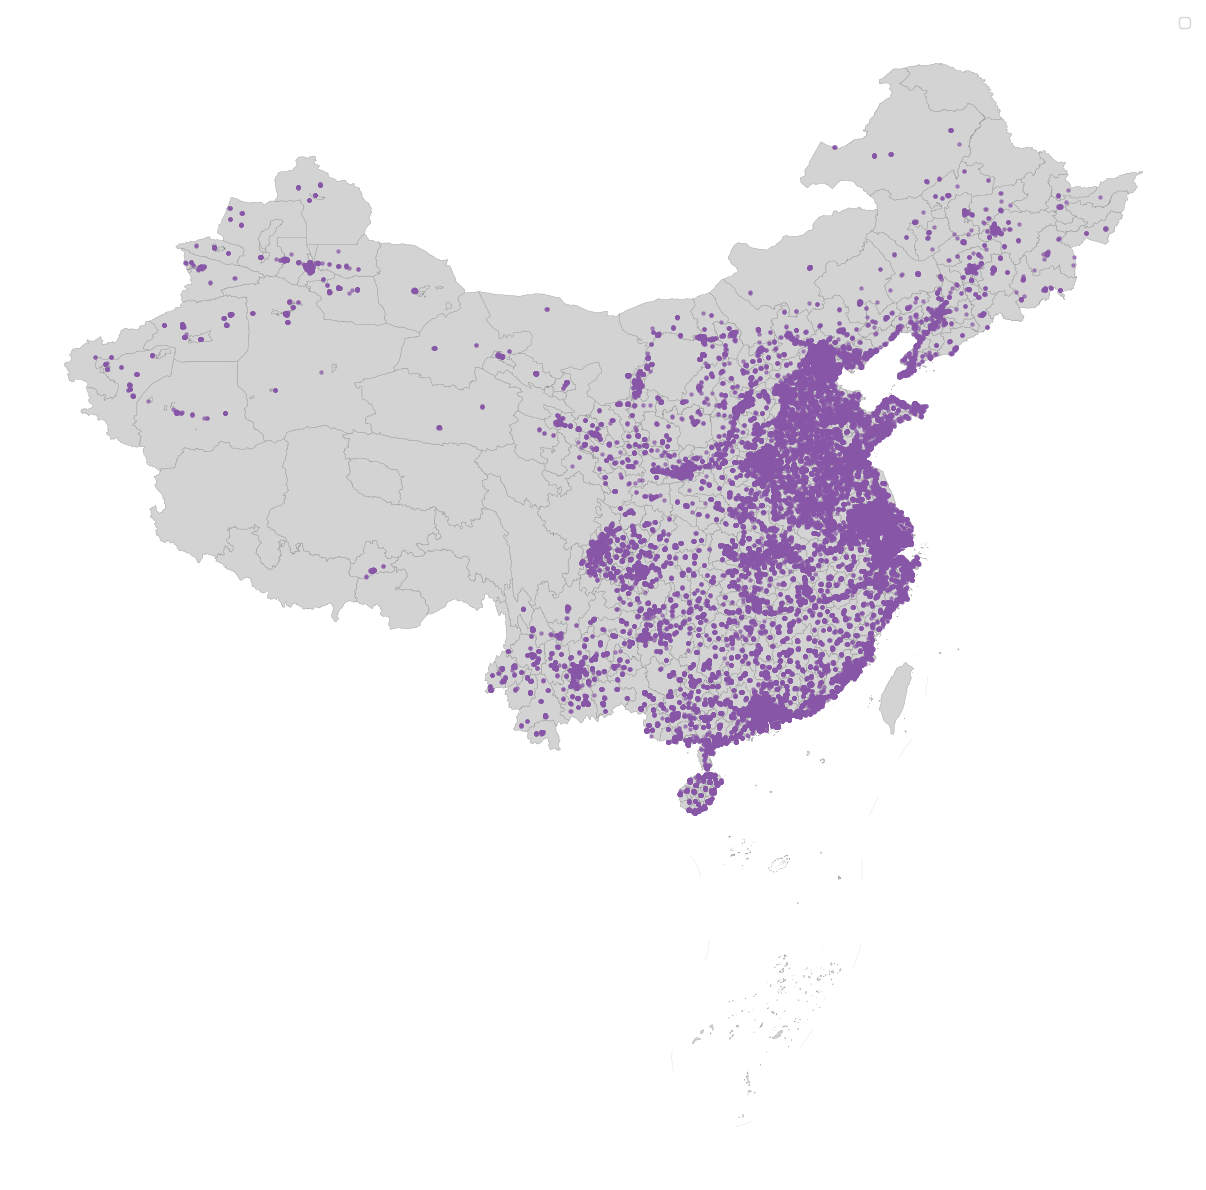

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Read charging station data
data = pd.read_csv('China_charging_stations_with_updated_min_max_values.csv')

# Create GeoDataFrame
gdf_charging = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.wgs84_lng, data.wgs84_lat),
    crs="EPSG:4326"  # WGS84 coordinate system
)

# Read Chinese administrative boundary (including Taiwan)
china_boundary = gpd.read_file('中国_市.geojson', engine='pyogrio')

# Ensure boundary data is in the same CRS as charging station data
china_boundary = china_boundary.to_crs("EPSG:4326")

# Create the plotting area
fig, ax = plt.subplots(figsize=(20, 12))

# Plot China's boundary (including Taiwan) with light gray fill and thin gray edges
china_boundary.plot(ax=ax, color="#D3D3D3", edgecolor="gray", linewidth=0.2)

# Plot charging station locations with semi-transparent purple markers
charging_plot = gdf_charging.plot(ax=ax, marker='o', markersize=5, color='#8856a7', alpha=0.6, label='Charging Stations')

# Set background color (optional, currently commented out)
# ax.set_facecolor('black')

# Remove axis
ax.axis('off')

# Add legend
plt.legend(handles=[charging_plot.collections[0]], labels=['Charging Stations'], loc='upper right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

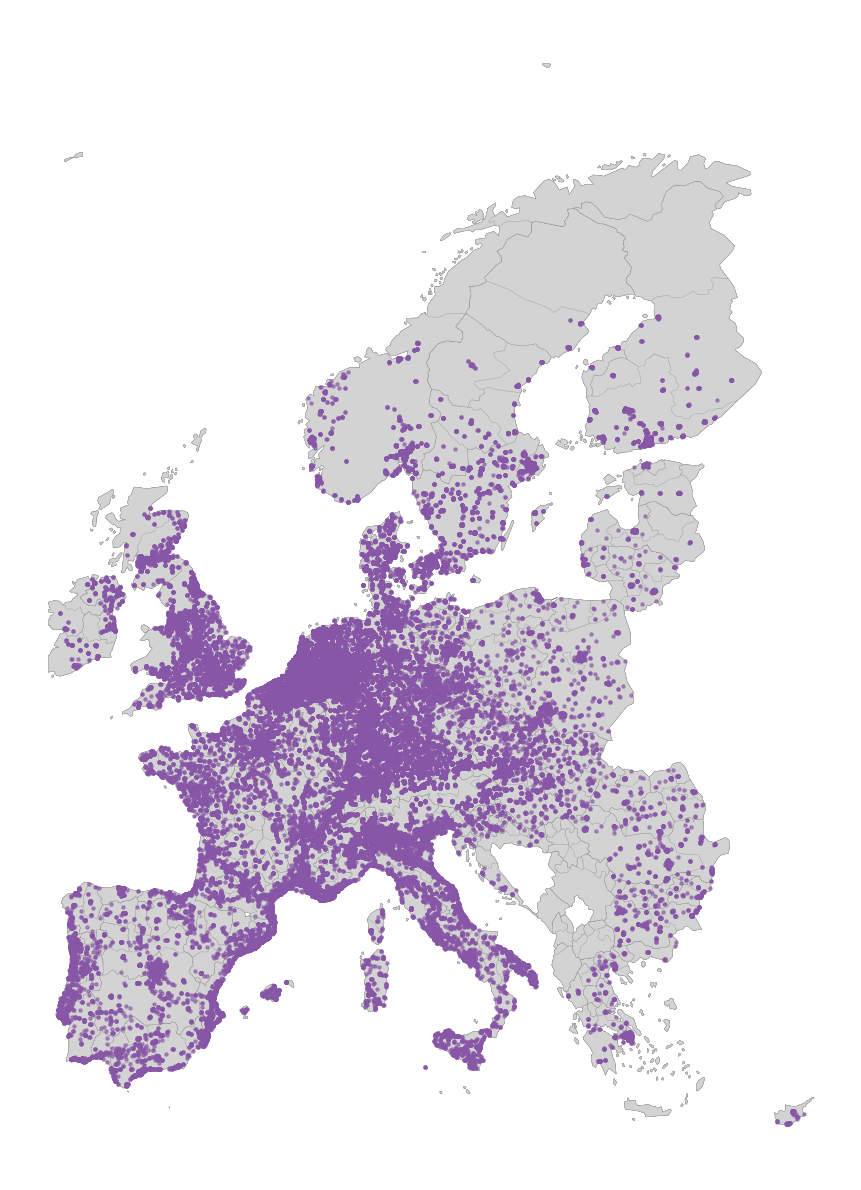

In [76]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon

# Read charging station data
data = pd.read_csv('EU_charging_stations_with_updated_min_max_values.csv')

# Create GeoDataFrame
gdf_charging = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.lon, data.lat),
    crs="EPSG:4326"  # WGS84 coordinate system
)

# Replace with your actual path, supports .geojson or .shp files
EU_boundary = gpd.read_file('NUTS_RG_20M_2021_4326.geojson', engine='pyogrio')  

# Filter out Turkey from European regions
country_code_field = 'CNTR_CODE'  # Use the actual field name
if country_code_field in EU_boundary.columns:
    EU_boundary = EU_boundary[EU_boundary[country_code_field] != 'TR']

# Ensure boundary data is in the same CRS as charging station data
EU_boundary = EU_boundary.to_crs("EPSG:4326")

# Add area restriction
area_limit = [(-10, 32), (35, 32), (35, 75), (-10, 75)]  # According to given coordinates
poly = Polygon(area_limit)
area_gdf = gpd.GeoDataFrame([1], geometry=[poly], crs="EPSG:4326")

# Clip boundaries and charging station locations to specified area
EU_boundary_clipped = gpd.clip(EU_boundary, area_gdf)
gdf_charging_clipped = gpd.clip(gdf_charging, area_gdf)

# Create the plotting area
fig, ax = plt.subplots(figsize=(20, 12))

# Plot EU boundaries
EU_boundary_clipped.plot(ax=ax, color="#D3D3D3", edgecolor="gray", linewidth=0.2)

# Plot charging station locations
gdf_charging_clipped.plot(ax=ax, marker='o', markersize=5, color='#8856a7', alpha=0.6)

# Set background color (optional, currently commented out)
#ax.set_facecolor('black')

# Remove axes
ax.axis('off')

# Show plot
plt.tight_layout()
plt.show()

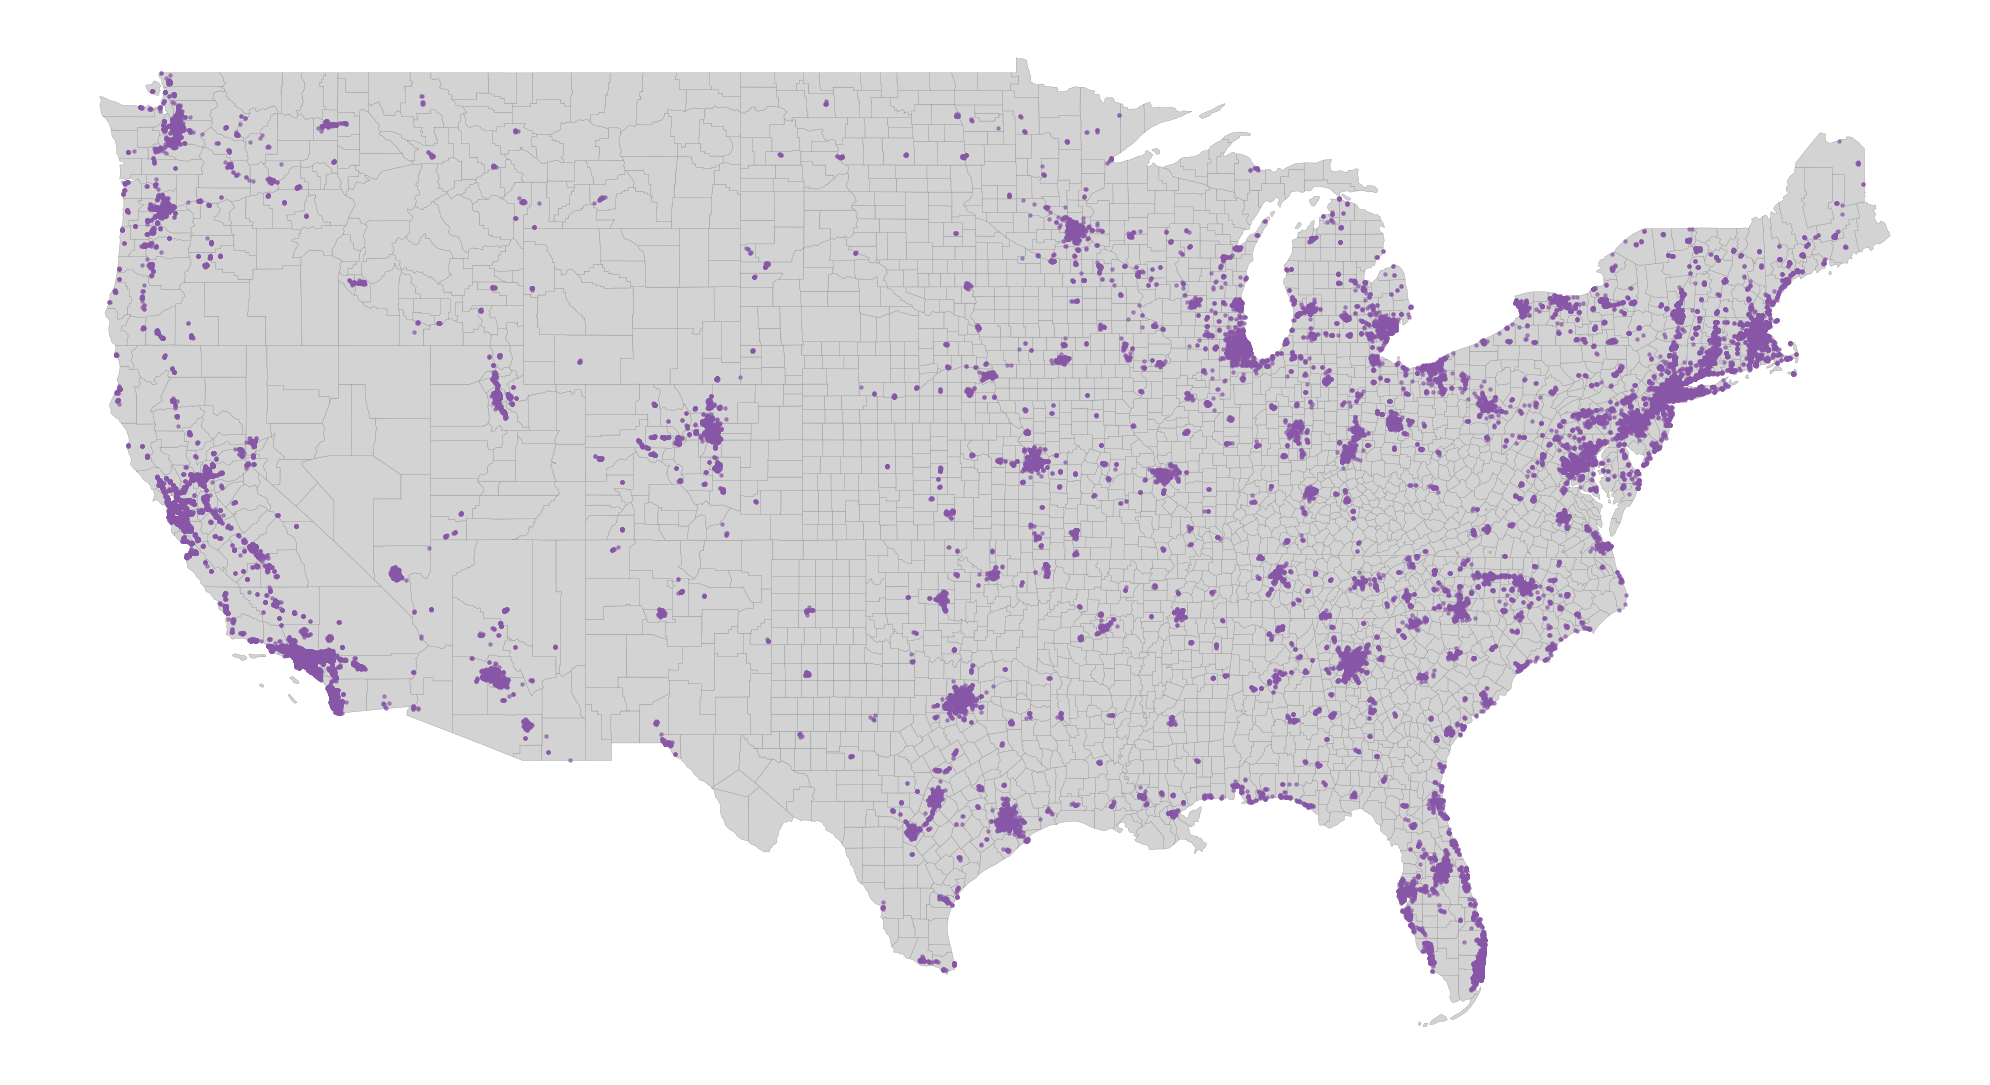

In [78]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon

# Read charging station data
data = pd.read_csv('USA_charging_stations_with_updated_min_max_values.csv')

# Create GeoDataFrame
gdf_charging = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.Longitude, data.Latitude),
    crs="EPSG:4326"  # WGS84 coordinate system
)

# Replace with your actual path; supports .geojson or .shp files
USA_boundary = gpd.read_file('counties.geojson', engine='pyogrio')

# Ensure boundary data is in the same CRS as charging station data
USA_boundary = USA_boundary.to_crs("EPSG:4326")

# Define area limits for continental US: (longitude, latitude)
# 'US': ((-125, -66), (24, 50))
# Increase area restriction
area_limit = [(-125, 24), (-66, 24), (-66, 50), (-125, 50)]  # Bounding box based on given coordinates
poly = Polygon(area_limit)
area_gdf = gpd.GeoDataFrame([1], geometry=[poly], crs="EPSG:4326")

# Clip boundary and charging station locations to the specified area
USA_boundary_clipped = gpd.clip(USA_boundary, area_gdf)
gdf_charging_clipped = gpd.clip(gdf_charging, area_gdf)

# Create the plotting area
fig, ax = plt.subplots(figsize=(20, 12))

# Plot USA boundary
USA_boundary_clipped.plot(ax=ax, color="#D3D3D3", edgecolor="gray", linewidth=0.2)

# Plot charging station locations
gdf_charging_clipped.plot(ax=ax, marker='o', markersize=5, color='#8856a7', alpha=0.6)

# Set background color (optional, currently commented out)
# ax.set_facecolor('black')

# Remove axes
ax.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

# Fig.1b Map visualization of wind and solar power generation
The data from Figure 2

In [ ]:
import pandas as pd
import geopandas as gpd

# Define file paths
csv_file = 'clustered_results_adjusted.csv'
china_city_geojson = '中国_市.geojson'
us_counties_geojson = 'counties.geojson'
eu_nuts_geojson = 'NUTS_RG_20M_2021_4326.geojson'

# Read CSV file
df_csv = pd.read_csv(csv_file)

# Read GeoJSON files
gdf_china = gpd.read_file(china_city_geojson, engine='pyogrio')
gdf_us = gpd.read_file(us_counties_geojson, engine='pyogrio')
gdf_eu = gpd.read_file(eu_nuts_geojson, engine='pyogrio')

# Ensure the China GeoDataFrame is in EPSG:4326
if gdf_china.crs.to_epsg() != 4326:
    gdf_china = gdf_china.to_crs(epsg=4326)
    print("Converted 中国_市.geojson to EPSG:4326")

# Preprocess U.S. county identifier in CSV to match the COUNTYNF format in us_counties_geojson
def format_county_ns(county_ns):
    return str(county_ns).zfill(8)

# Assume the U.S. county identifier in CSV is in the 'City' column and Area is 'USA'
df_csv['COUNTYNS'] = df_csv[df_csv['Area'] == 'USA']['City'].apply(format_county_ns)

# Merge data
# China part: merge on city name
gdf_china_merged = gdf_china.merge(df_csv[df_csv['Area'] == 'China'], left_on='name', right_on='City', how='left')
print(f"Number of Chinese cities with new data: {gdf_china_merged[['City']].notna().sum().values[0]}")

# U.S. part: merge on formatted COUNTYNS
gdf_us_merged = gdf_us.merge(df_csv[df_csv['Area'] == 'USA'], left_on='COUNTYNS', right_on='COUNTYNS', how='left')
print(f"Number of U.S. counties with new data: {gdf_us_merged[['City']].notna().sum().values[0]}")

# EU part: merge on NUTS_NAME
gdf_eu_merged = gdf_eu.merge(df_csv[df_csv['Area'] == 'EU'], left_on='NUTS_NAME', right_on='City', how='left')
print(f"Number of EU regions with new data: {gdf_eu_merged[['City']].notna().sum().values[0]}")

# Save merged GeoDataFrames to new GeoJSON files
output_china = 'china_cities_with_dataHighLow.geojson'
output_us = 'us_counties_with_dataHighLow.geojson'
output_eu = 'eu_nuts_with_dataHighLow.geojson'

gdf_china_merged.to_file(output_china, driver='GeoJSON')
gdf_us_merged.to_file(output_us, driver='GeoJSON')
gdf_eu_merged.to_file(output_eu, driver='GeoJSON')

print(f"Saved new GeoJSON files to: {output_china}, {output_us}, and {output_eu}")

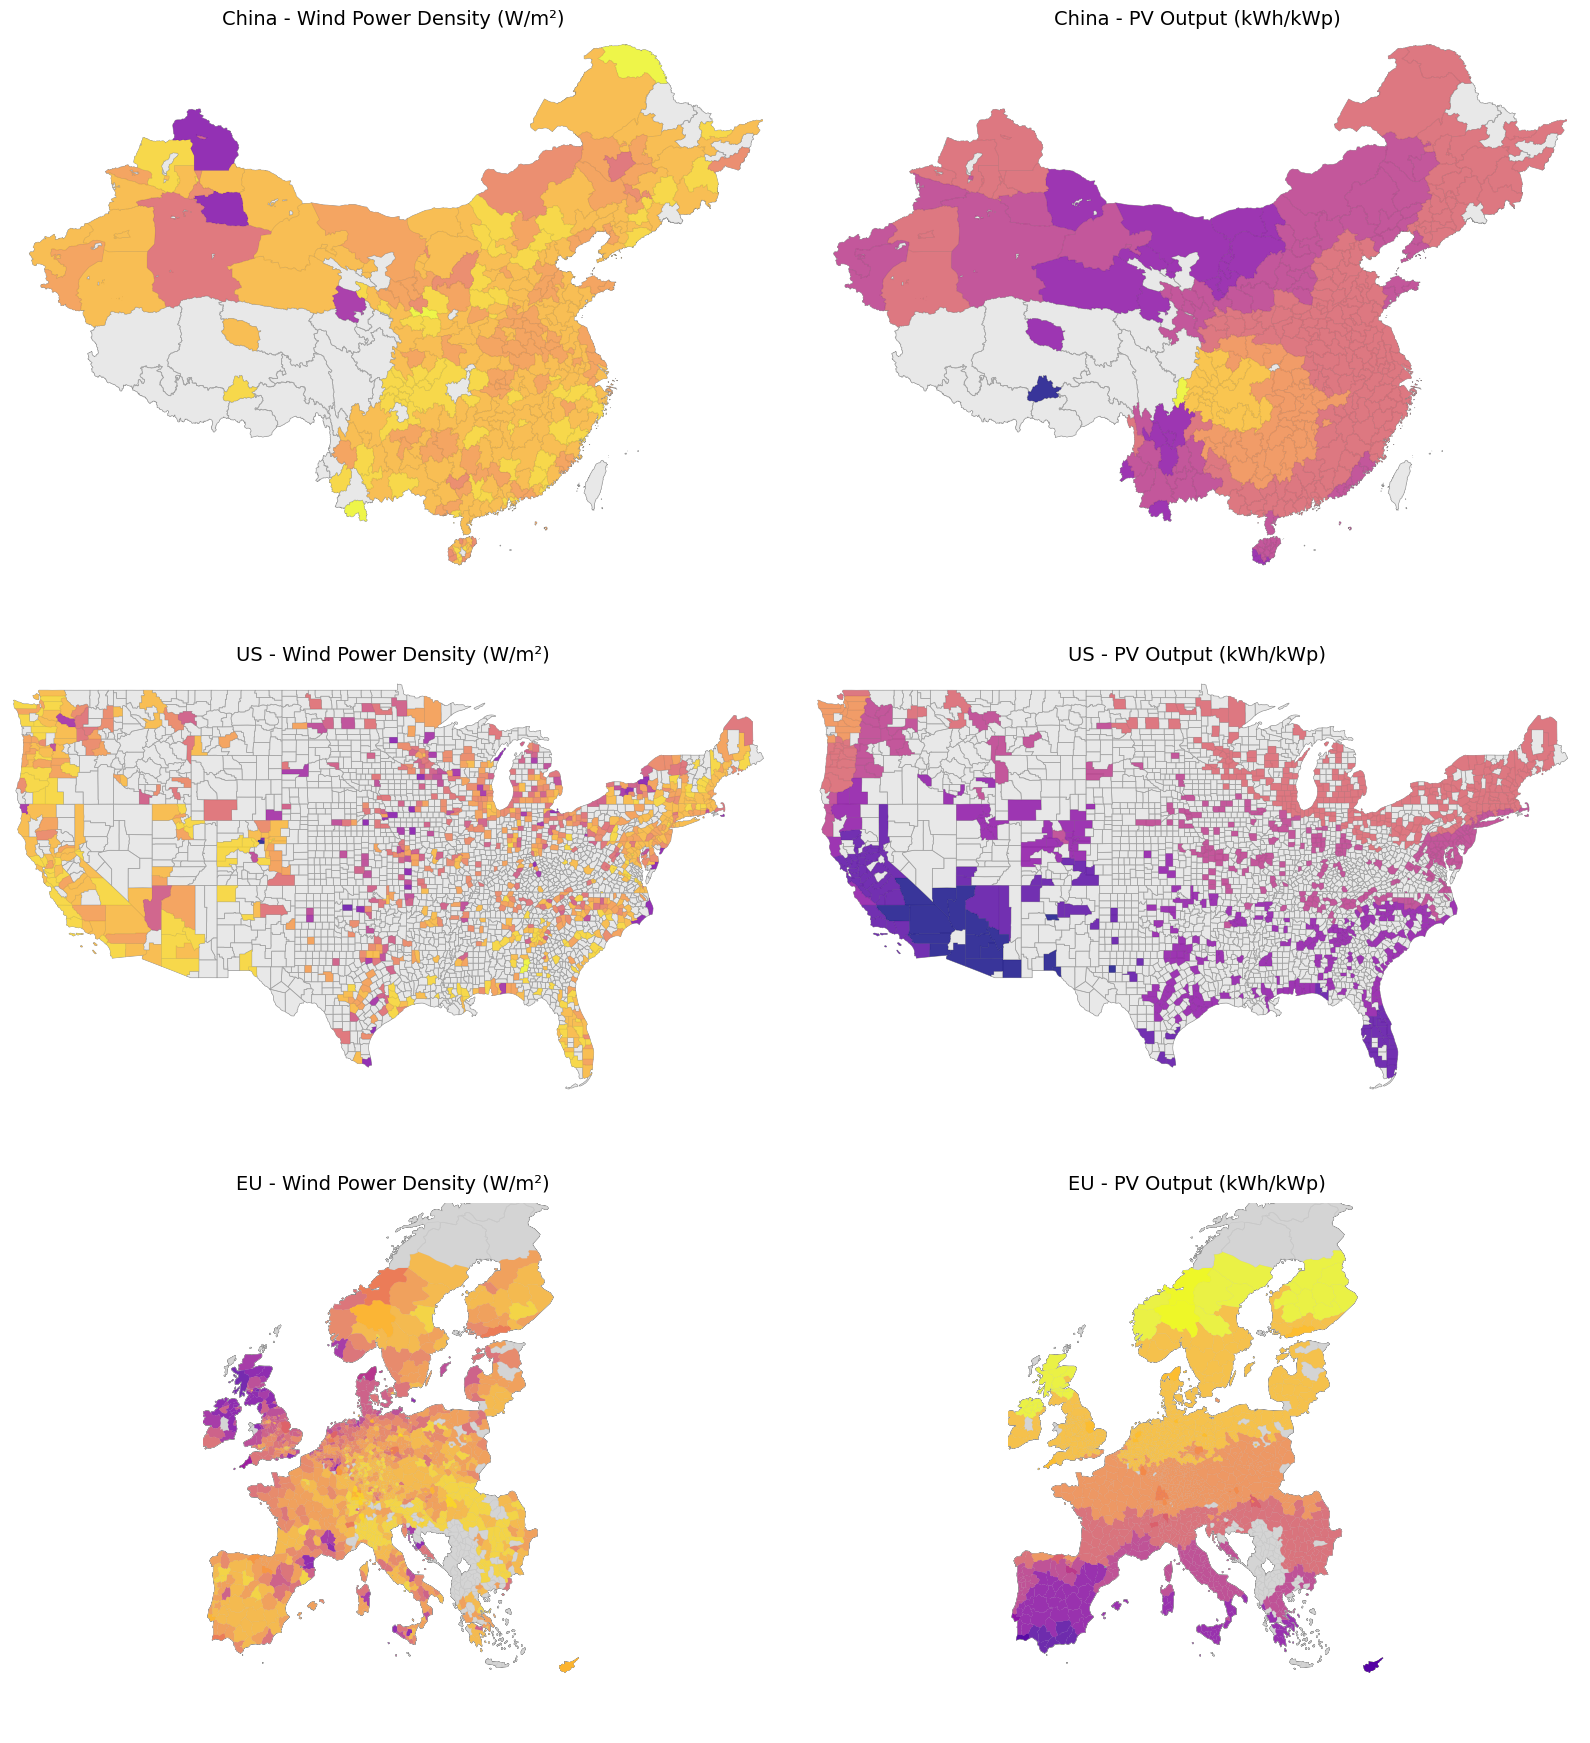

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import pandas as pd

# Define file paths
china_city_geojson = 'china_cities_with_dataHighLow.geojson'
us_counties_geojson = 'us_counties_with_dataHighLow.geojson'
eu_nuts_geojson = 'eu_nuts_with_dataHighLow.geojson'

# Read GeoJSON files
gdf_china = gpd.read_file(china_city_geojson, engine='pyogrio')
gdf_us = gpd.read_file(us_counties_geojson, engine='pyogrio')
gdf_eu = gpd.read_file(eu_nuts_geojson, engine='pyogrio')

# Convert China GeoDataFrame to EPSG:4326 if not already
if gdf_china.crs.to_epsg() != 4326:
    gdf_china = gdf_china.to_crs(epsg=4326)
    print("Converted China data to EPSG:4326")

# Prepare plotting data
def prepare_data(gdf):
    # Ensure target columns are numeric
    gdf['avg_PV_value'] = pd.to_numeric(gdf['avg_PV_value'], errors='coerce')
    gdf['avg_power_density'] = pd.to_numeric(gdf['avg_power_density'], errors='coerce')
    return gdf

# Prepare data
gdf_china_ready = prepare_data(gdf_china)
gdf_us_ready = prepare_data(gdf_us)
gdf_eu_ready = prepare_data(gdf_eu)

# Filter to exclude Alaska and Hawaii from the U.S. data
gdf_us_ready = gdf_us_ready[~gdf_us_ready['STATEFP'].isin(['02', '15'])]

# Filter to exclude Turkey from EU data
country_code_field = 'CNTR_CODE'
gdf_eu_ready = gdf_eu_ready[gdf_eu_ready[country_code_field] != 'TR']

# Define color maps and bin boundaries
cmap_pv = plt.cm.plasma_r  # Use reversed plasma colormap for PV
cmap_wind = plt.cm.plasma_r  # Use reversed plasma colormap for wind

# Define classification bins
pv_bounds = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
wind_bounds = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300]

norm_pv = BoundaryNorm(pv_bounds, cmap_pv.N)
norm_wind = BoundaryNorm(wind_bounds, cmap_wind.N)

# Modified plotting function
def plot_region(ax, full_gdf, gdf_ready, col, norm, cmap, title, region_bounds, exclude_country=None):
    # Exclude specific country if specified
    if exclude_country is not None and country_code_field in full_gdf.columns:
        full_gdf_excluded = full_gdf[full_gdf[country_code_field] != exclude_country]
    else:
        full_gdf_excluded = full_gdf
    
    # For China, exclude non-polygon geometries (e.g., points)
    if 'China' in title:
        full_gdf_excluded = full_gdf_excluded[
            full_gdf_excluded.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])
        ]

    # Plot base map (boundaries and background)
    full_gdf_excluded.boundary.plot(ax=ax, color='gray', linewidth=0.5, zorder=0)
    full_gdf_excluded.plot(ax=ax, color='#D3D3D3', edgecolor='none', alpha=0.5, zorder=1)
    
    # Plot data (only regions with valid data)
    if not gdf_ready.empty:
        valid_data = gdf_ready[gdf_ready[col].notna()]
        if not valid_data.empty:
            valid_data.plot(
                ax=ax,
                column=col,
                cmap=cmap,
                norm=norm,
                legend=False,
                edgecolor='none',
                alpha=0.8,
                zorder=2
            )
    
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlim(region_bounds[0])
    ax.set_ylim(region_bounds[1])
    ax.set_axis_off()

# Define spatial bounds for each region
regions_bounds = {
    'China': ((73, 135), (18, 54)),
    'US': ((-125, -66), (24, 50)),
    'EU': ((-10, 35), (30, 70))
}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Plot wind and solar potential for China, US, and EU
plot_region(axes[0, 0], gdf_china, gdf_china_ready, 'avg_power_density', norm_wind, cmap_wind, 'China - Wind Power Density (W/m²)', regions_bounds['China'])
plot_region(axes[0, 1], gdf_china, gdf_china_ready, 'avg_PV_value', norm_pv, cmap_pv, 'China - PV Output (kWh/kWp)', regions_bounds['China'])
plot_region(axes[1, 0], gdf_us, gdf_us_ready, 'avg_power_density', norm_wind, cmap_wind, 'US - Wind Power Density (W/m²)', regions_bounds['US'])
plot_region(axes[1, 1], gdf_us, gdf_us_ready, 'avg_PV_value', norm_pv, cmap_pv, 'US - PV Output (kWh/kWp)', regions_bounds['US'])
plot_region(axes[2, 0], gdf_eu, gdf_eu_ready, 'avg_power_density', norm_wind, cmap_wind, 'EU - Wind Power Density (W/m²)', regions_bounds['EU'], exclude_country='TR')
plot_region(axes[2, 1], gdf_eu, gdf_eu_ready, 'avg_PV_value', norm_pv, cmap_pv, 'EU - PV Output (kWh/kWp)', regions_bounds['EU'], exclude_country='TR')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.1, wspace=0.05)

# Save and display plot (save option commented out)
# plt.savefig('combined_energy_potential.png', dpi=300, bbox_inches='tight')
plt.show()




# Fig.1（c）

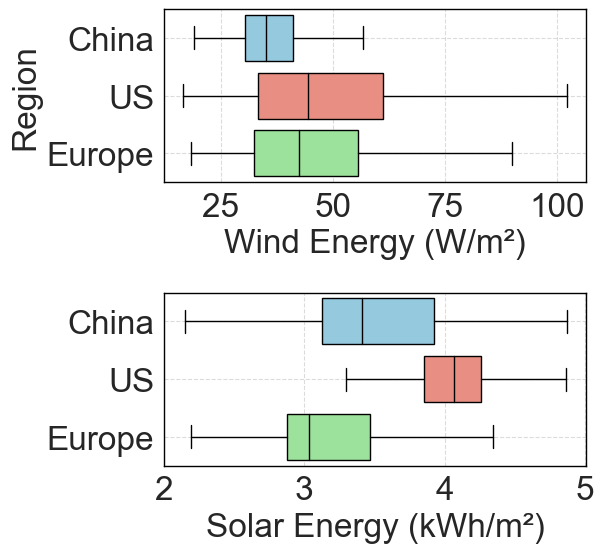

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Chinese font support (if labels require Chinese characters)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. Read energy data (wind and solar PV)
gdf_china_energy = gpd.read_file('china_cities_with_dataHighLow.geojson', engine='pyogrio')
gdf_us_energy = gpd.read_file('us_counties_with_dataHighLow.geojson', engine='pyogrio')
gdf_eu_energy = gpd.read_file('eu_nuts_with_dataHighLow.geojson', engine='pyogrio')

# 2. Data preparation function
def prepare_energy_data(gdf, region_name):
    """Prepare energy data (wind power density and solar PV output)"""
    df = pd.DataFrame({
        'wind_power': pd.to_numeric(gdf['avg_power_density'], errors='coerce'),
        'solar_pv': pd.to_numeric(gdf['avg_PV_value'], errors='coerce'),
        'region': region_name
    })
    return df.dropna()

# 3. Prepare data for each region
# Wind and solar data
china_energy = prepare_energy_data(gdf_china_energy, 'China')
us_energy = prepare_energy_data(
    gdf_us_energy[~gdf_us_energy['STATEFP'].isin(['02', '15'])], 'US'
)  # Exclude Alaska and Hawaii
eu_energy = prepare_energy_data(
    gdf_eu_energy[gdf_eu_energy['CNTR_CODE'] != 'TR'], 'Europe'
)  # Exclude Turkey

# 4. Combine data
energy_combined = pd.concat([china_energy, us_energy, eu_energy])

# Define color palette for regions
color_palette = {'China': 'skyblue', 'US': '#FA8072', 'Europe': '#90EE90'}

# Create two vertically stacked subplots
sns.set_style("white")  # Set Seaborn style to white background
fig, axes = plt.subplots(2, 1, figsize=(6.5, 6))  # Adjust size for vertical layout

# Define consistent boxplot styling
boxprops = dict(linewidth=1, edgecolor='black')
whiskerprops = dict(linewidth=1, color='black')
capprops = dict(linewidth=1, color='black')
medianprops = dict(linewidth=1, color='black')

# Plot boxplot - Wind power density
sns.boxplot(data=energy_combined, y='region', x='wind_power', ax=axes[0],
            order=['China', 'US', 'Europe'], showfliers=False,
            palette=color_palette, boxprops=boxprops, whiskerprops=whiskerprops,
            capprops=capprops, medianprops=medianprops)
axes[0].set_xlabel('Wind Energy (W/m²)', fontsize=24)
axes[0].set_ylabel('Region', fontsize=24)
axes[0].tick_params(axis='both', labelsize=24)

# Add major grid lines
axes[0].grid(True, linestyle='--', which='major', alpha=0.7)

# Add solid border around the plot
for spine in axes[0].spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

# Plot boxplot - Solar PV output
sns.boxplot(data=energy_combined, y='region', x='solar_pv', ax=axes[1],
            order=['China', 'US', 'Europe'], showfliers=False,
            palette=color_palette, boxprops=boxprops, whiskerprops=whiskerprops,
            capprops=capprops, medianprops=medianprops)
axes[1].set_xlabel('Solar Energy (kWh/m²)', fontsize=24)
axes[1].set_ylabel('', fontsize=24)  # No ylabel on second subplot
axes[1].tick_params(axis='both', labelsize=24)

# Manually set x-axis tick labels for solar subplot
axes[1].set_xticks([2, 3, 4, 5])
axes[1].set_xticklabels(['2', '3', '4', '5'])

# Add major grid lines
axes[1].grid(True, linestyle='--', which='major', alpha=0.7)

# Add solid border around the plot
for spine in axes[1].spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

# Adjust layout and display
plt.tight_layout()
# Optional: Save figure
# plt.savefig('combined_analysis_boxplots_vertical_with_units.png', dpi=300, bbox_inches='tight')
plt.show()

# Fig.1(d)  USA

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
data_file_path = 'USA_charging_stations_with_updated_min_max_values.csv'
df = pd.read_csv(data_file_path)

# Define constants
swept_area = 2.7        # m^2, swept area of the wind turbine
rated_power = 1         # kW, rated power of the turbine
efficiency = 0.35       # Wind turbine efficiency
hours_per_year = 3000   # Number of hours per year (assumed operational hours)
days_per_year = 365     # Number of days per year
conversion_efficiency = 0.18  # Photovoltaic panel conversion efficiency (e.g., 18%)
wind_power_density_threshold = 16.5375  # Wind power density threshold (W/m²)

# Function to convert wind power density to annual energy production
def wind_energy_potential(power_density):
    energy_per_year = power_density * swept_area * efficiency * hours_per_year / 1000  # Convert to kWh
    return energy_per_year

# Function to convert GHI (Global Horizontal Irradiance) to annual PV energy production
def pv_energy_potential(ghi_value):
    energy_per_year = ghi_value * days_per_year * conversion_efficiency  # kWh/m²/year
    return energy_per_year

# Group data by COUNTYNS
grouped = df.groupby('COUNTYNS')

# Initialize an empty list to store results
results = []

# Process each county
for county, group in grouped:
    # Filter charging stations that can generate wind energy (above threshold)
    can_wind_generate_group = group[group['Power_Density'] >= wind_power_density_threshold]
    
    # Check if wind energy development condition is met (at least 5 stations)
    if len(can_wind_generate_group) < 5:
        city_wind_min = city_wind_median = city_wind_max = np.nan
        wind_energy_min = wind_energy_median = wind_energy_max = np.nan
    else:
        # Calculate wind power density statistics
        city_wind_min = can_wind_generate_group['Power_Density'].min()
        city_wind_median = can_wind_generate_group['Power_Density'].median()
        city_wind_max = can_wind_generate_group['Power_Density'].max()

        # Convert wind power density to annual energy output
        wind_energy_min = wind_energy_potential(city_wind_min)
        wind_energy_median = wind_energy_potential(city_wind_median)
        wind_energy_max = wind_energy_potential(city_wind_max)

    # Calculate solar (GHI) statistics for all counties
    city_ghi_min = group['GHI_value'].min()
    city_ghi_median = group['GHI_value'].median()
    city_ghi_max = group['GHI_value'].max()

    # Convert GHI to annual PV energy output
    pv_energy_min = pv_energy_potential(city_ghi_min)
    pv_energy_median = pv_energy_potential(city_ghi_median)
    pv_energy_max = pv_energy_potential(city_ghi_max)

    # Append results for this county
    results.append({
        'COUNTYNS': county,
        'City_Wind_Min': city_wind_min,
        'City_Wind_Median': city_wind_median,
        'City_Wind_Max': city_wind_max,
        'City_GHI_Min': city_ghi_min,
        'City_GHI_Median': city_ghi_median,
        'City_GHI_Max': city_ghi_max,
        'Wind_Energy_Min': wind_energy_min,
        'Wind_Energy_Median': wind_energy_median,
        'Wind_Energy_Max': wind_energy_max,
        'PV_Energy_Min': pv_energy_min,
        'PV_Energy_Median': pv_energy_median,
        'PV_Energy_Max': pv_energy_max
    })

# Convert results list to DataFrame
result_df = pd.DataFrame(results)

# Save results to a new CSV file
output_file_path = 'USAcity_renewable_energy_potential_filtered.csv'
result_df.to_csv(output_file_path, index=False, float_format='%.2f')

print(f"Results saved to: {output_file_path}")

# Fig.1(d)  China

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
data_file_path = 'China_charging_stations_with_updated_min_max_values.csv'
df = pd.read_csv(data_file_path)

# Define constants
swept_area = 2.7        # m^2, swept area of the wind turbine
rated_power = 1         # kW, rated power of the turbine
efficiency = 0.35       # Wind turbine efficiency
hours_per_year = 3000   # Number of operational hours per year (assumed)
days_per_year = 365     # Number of days per year
conversion_efficiency = 0.18  # Photovoltaic panel conversion efficiency (e.g., 18%)
wind_power_density_threshold = 16.5375  # Wind power density threshold (W/m²)

# Function to convert wind power density to annual energy production
def wind_energy_potential(power_density):
    energy_per_year = power_density * swept_area * efficiency * hours_per_year / 1000  # Convert to kWh
    return energy_per_year

# Function to convert GHI (Global Horizontal Irradiance) to annual PV energy production
def pv_energy_potential(ghi_value):
    energy_per_year = ghi_value * days_per_year * conversion_efficiency  # kWh/m²/year
    return energy_per_year

# Group data by city
grouped = df.groupby('city')

# Initialize an empty list to store results
results = []

# Process each city
for city, group in grouped:
    # Filter charging stations capable of wind energy generation (above threshold)
    can_wind_generate_group = group[group['power_density'] >= wind_power_density_threshold]
    
    # Check if the city meets wind energy development criteria (at least 5 stations)
    if len(can_wind_generate_group) < 5:
        # Set wind-related values to NaN if condition is not met
        city_wind_min = city_wind_median = city_wind_max = np.nan
        wind_energy_min = wind_energy_median = wind_energy_max = np.nan
    else:
        # Calculate min, median, and max wind power density for qualified stations
        city_wind_min = can_wind_generate_group['power_density'].min()
        city_wind_median = can_wind_generate_group['power_density'].median()
        city_wind_max = can_wind_generate_group['power_density'].max()

        # Convert wind power density values to annual energy output
        wind_energy_min = wind_energy_potential(city_wind_min)
        wind_energy_median = wind_energy_potential(city_wind_median)
        wind_energy_max = wind_energy_potential(city_wind_max)

    # Calculate PV (GHI) min, median, and max values for all stations in the city
    city_pv_min = group['GHI_value'].min()
    city_pv_median = group['GHI_value'].median()
    city_pv_max = group['GHI_value'].max()
    
    # Convert GHI values to annual photovoltaic energy output
    pv_energy_min = pv_energy_potential(city_pv_min)
    pv_energy_median = pv_energy_potential(city_pv_median)
    pv_energy_max = pv_energy_potential(city_pv_max)

    # Append the results for this city
    results.append({
        'City': city,
        'City_Wind_Min': city_wind_min,
        'City_Wind_Median': city_wind_median,
        'City_Wind_Max': city_wind_max,
        'City_GHI_Min': city_pv_min,
        'City_GHI_Median': city_pv_median,
        'City_GHI_Max': city_pv_max,
        'Wind_Energy_Min': wind_energy_min,
        'Wind_Energy_Median': wind_energy_median,
        'Wind_Energy_Max': wind_energy_max,
        'PV_Energy_Min': pv_energy_min,
        'PV_Energy_Median': pv_energy_median,
        'PV_Energy_Max': pv_energy_max
    })

# Convert results list to a DataFrame
result_df = pd.DataFrame(results)

# Save results to a new CSV file
output_file_path = 'Chinacity_renewable_energy_potential_filtered.csv'
result_df.to_csv(output_file_path, index=False, float_format='%.2f')

print(f"Results saved to: {output_file_path}")

#  Fig.1(d)  Europe

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
data_file_path = 'EU_charging_stations_with_updated_min_max_values.csv'
df = pd.read_csv(data_file_path)

# Define constants
swept_area = 2.7        # m^2, swept area of the wind turbine
rated_power = 1         # kW, rated power of the turbine
efficiency = 0.35       # Wind turbine efficiency
hours_per_year = 3000   # Number of operational hours per year (assumed)
days_per_year = 365     # Number of days per year
conversion_efficiency = 0.18  # Photovoltaic panel conversion efficiency (e.g., 18%)
wind_power_density_threshold = 16.5375  # Wind power density threshold (W/m²)

# Function to convert wind power density to annual energy production
def wind_energy_potential(power_density):
    energy_per_year = power_density * swept_area * efficiency * hours_per_year / 1000  # Convert to kWh
    return energy_per_year

# Function to convert GHI (Global Horizontal Irradiance) to annual PV energy production
def pv_energy_potential(ghi_value):
    energy_per_year = ghi_value * days_per_year * conversion_efficiency  # kWh/m²/year
    return energy_per_year

# Group data by NUTS region name (city/region level)
grouped = df.groupby('NUTS_NAME_right')

# Initialize an empty list to store results
results = []

# Process each region
for city, group in grouped:
    # Filter charging stations capable of wind energy generation (above threshold)
    can_wind_generate_group = group[group['power_density'] >= wind_power_density_threshold]
    
    # Check if the region meets wind energy development criteria (at least 5 stations)
    if len(can_wind_generate_group) < 5:
        # Set wind-related values to NaN if condition is not met
        city_wind_min = city_wind_median = city_wind_max = np.nan
        wind_energy_min = wind_energy_median = wind_energy_max = np.nan
    else:
        # Calculate min, median, and max wind power density for qualified stations
        city_wind_min = can_wind_generate_group['power_density'].min()
        city_wind_median = can_wind_generate_group['power_density'].median()
        city_wind_max = can_wind_generate_group['power_density'].max()

        # Convert wind power density values to annual energy output
        wind_energy_min = wind_energy_potential(city_wind_min)
        wind_energy_median = wind_energy_potential(city_wind_median)
        wind_energy_max = wind_energy_potential(city_wind_max)

    # Calculate PV (GHI) min, median, and max values for all stations in the region
    city_pv_min = group['GHI_value'].min()
    city_pv_median = group['GHI_value'].median()
    city_pv_max = group['GHI_value'].max()
    
    # Convert GHI values to annual photovoltaic energy output
    pv_energy_min = pv_energy_potential(city_pv_min)
    pv_energy_median = pv_energy_potential(city_pv_median)
    pv_energy_max = pv_energy_potential(city_pv_max)

    # Append the results for this region
    results.append({
        'City': city,
        'City_Wind_Min': city_wind_min,
        'City_Wind_Median': city_wind_median,
        'City_Wind_Max': city_wind_max,
        'City_GHI_Min': city_pv_min,
        'City_GHI_Median': city_pv_median,
        'City_GHI_Max': city_pv_max,
        'Wind_Energy_Min': wind_energy_min,
        'Wind_Energy_Median': wind_energy_median,
        'Wind_Energy_Max': wind_energy_max,
        'PV_Energy_Min': pv_energy_min,
        'PV_Energy_Median': pv_energy_median,
        'PV_Energy_Max': pv_energy_max
    })

# Convert results list to a DataFrame
result_df = pd.DataFrame(results)

# Save results to a new CSV file
output_file_path = 'EUcity_renewable_energy_potential_filtered.csv'
result_df.to_csv(output_file_path, index=False, float_format='%.2f')

print(f"Results saved to: {output_file_path}")

# Merge the above three files

In [ ]:
import pandas as pd

# Define file paths and corresponding region labels
file_paths = {
    'China': 'Chinacity_renewable_energy_potential_filtered.csv',
    'USA': 'USAcity_renewable_energy_potential_filtered.csv',
    'EU': 'EUcity_renewable_energy_potential_filtered.csv'
}

# Initialize an empty list to store DataFrames
dataframes = []

# Read each CSV file, add a 'Region' column, and standardize the city column name to 'City'
for region, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    
    # Rename the city identifier column based on region
    if region == 'USA':
        df.rename(columns={'COUNTYNS': 'City'}, inplace=True)
    elif region in ['China', 'EU']:
        # Adjust this line if different column names are used for city/region in other datasets
        df.rename(columns={'NUTS_NAME_right': 'City'}, inplace=True)
    
    # Add a new column to identify the data source region
    df['Region'] = region
    
    dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Check if the combined DataFrame contains all expected columns
expected_columns = [
    'City', 'City_Wind_Min', 'City_Wind_Median', 'City_Wind_Max', 
    'City_GHI_Min', 'City_GHI_Median', 'City_GHI_Max', 
    'Wind_Energy_Min', 'Wind_Energy_Median', 'Wind_Energy_Max', 
    'PV_Energy_Min', 'PV_Energy_Median', 'PV_Energy_Max', 'Region'
]

if not all(column in combined_df.columns for column in expected_columns):
    raise ValueError("Not all expected columns are present in the combined DataFrame.")

# Save the combined results to a new CSV file
output_file_path = 'global_city_renewable_energy_potential.csv'
combined_df.to_csv(output_file_path, index=False)

print(f"Combined results saved to {output_file_path}")

# Fig.1d

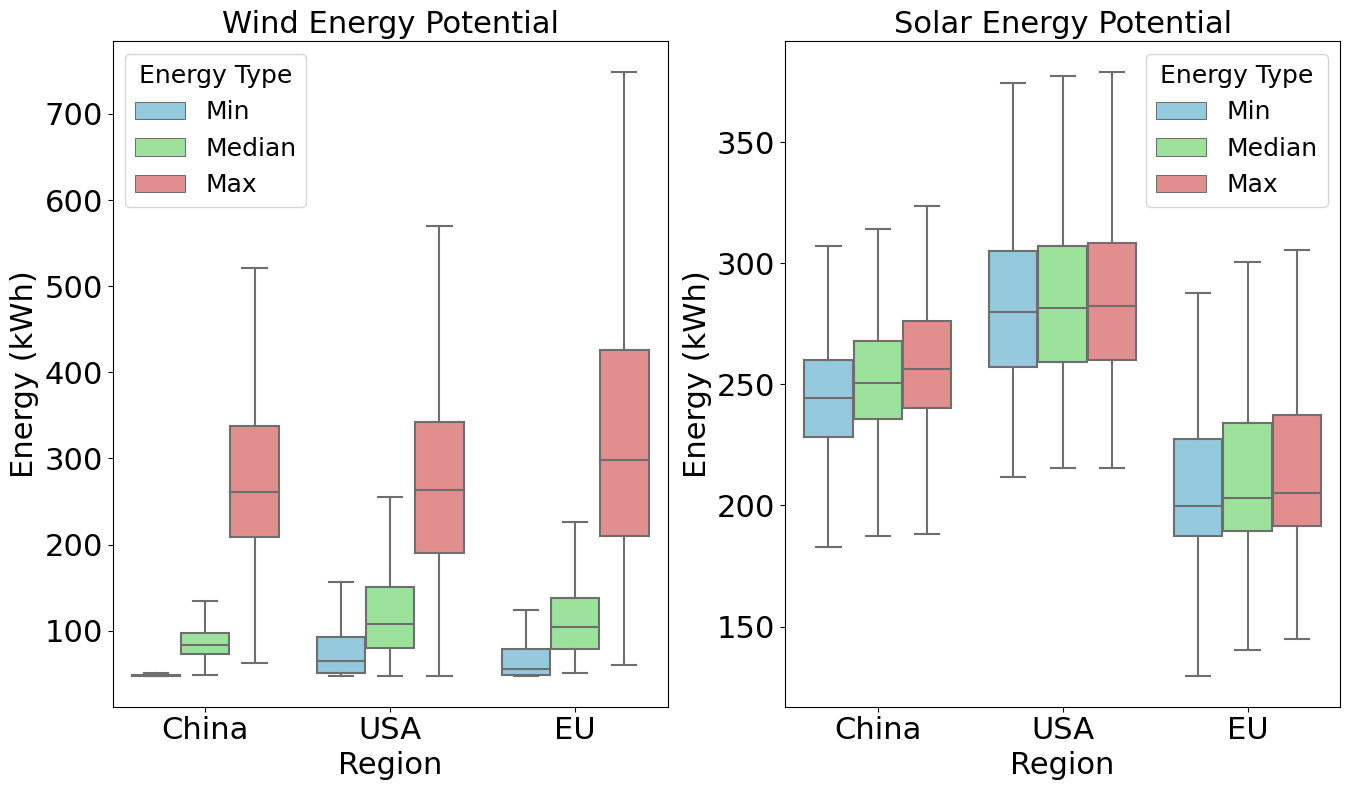

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
output_file_path = 'global_city_renewable_energy_potential.csv'
df = pd.read_csv(output_file_path)

# Reshape wind and solar energy potential data into long format and standardize the 'Type' values
wind_melted = df.melt(id_vars=['Region'], 
                      value_vars=['Wind_Energy_Min', 'Wind_Energy_Median', 'Wind_Energy_Max'],
                      var_name='Type', value_name='Energy')
pv_melted = df.melt(id_vars=['Region'], 
                    value_vars=['PV_Energy_Min', 'PV_Energy_Median', 'PV_Energy_Max'],
                    var_name='Type', value_name='Energy')

# Replace 'Type' values to 'Min', 'Median', 'Max'
wind_melted['Type'] = wind_melted['Type'].str.replace('Wind_Energy_', '').str.capitalize()
pv_melted['Type'] = pv_melted['Type'].str.replace('PV_Energy_', '').str.capitalize()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Define color palette
palette = {"Min": "skyblue", "Median": "lightgreen", "Max": "lightcoral"}

# Plot wind energy potential boxplot
sns.boxplot(data=wind_melted, x='Region', y='Energy', hue='Type', ax=axes[0], palette=palette, showfliers=False)
axes[0].set_title('Wind Energy Potential', fontsize=22)
axes[0].set_xlabel('Region', fontsize=22)
axes[0].set_ylabel('Energy (kWh)', fontsize=22)
axes[0].tick_params(axis='both', which='major', labelsize=22)

# Plot solar energy potential boxplot
sns.boxplot(data=pv_melted, x='Region', y='Energy', hue='Type', ax=axes[1], palette=palette, showfliers=False)
axes[1].set_title('Solar Energy Potential', fontsize=22)
axes[1].set_xlabel('Region', fontsize=22)
axes[1].set_ylabel('Energy (kWh)', fontsize=22)
axes[1].tick_params(axis='both', which='major', labelsize=22)

# Set legend font size for both subplots
for ax in axes:
    ax.legend(title='Energy Type', fontsize=18, title_fontsize=18)

# Collect all legend handles and labels
handles, labels = [], []
for ax in axes:
    handles.extend(ax.get_legend_handles_labels()[0])
    labels.extend(ax.get_legend_handles_labels()[1])

# Adjust layout to prevent overlap, leaving space for a shared legend (currently commented out)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for a potential shared legend

# Display the plot
plt.show()

# Cost-benefit analysis

In [12]:


import pandas as pd

# Read the CSV file
output_file_path = 'global_city_renewable_energy_potential.csv'
df = pd.read_csv(output_file_path)

# Reshape wind and solar energy potential data into long format and standardize the 'Type' values
wind_melted = df.melt(id_vars=['Region'], 
                      value_vars=['Wind_Energy_Min', 'Wind_Energy_Median', 'Wind_Energy_Max'],
                      var_name='Type', value_name='Energy')
pv_melted = df.melt(id_vars=['Region'], 
                    value_vars=['PV_Energy_Min', 'PV_Energy_Median', 'PV_Energy_Max'],
                    var_name='Type', value_name='Energy')

# Replace 'Type' column values to 'Min', 'Median', 'Max'
wind_melted['Type'] = wind_melted['Type'].str.replace('Wind_Energy_', '').str.capitalize()
pv_melted['Type'] = pv_melted['Type'].str.replace('PV_Energy_', '').str.capitalize()

# Calculate and print the average and median values for each region's data type
def print_stats(melted_df, energy_type):
    print(f"Average {energy_type} Energy Potential:")
    avg_values = melted_df.groupby(['Region', 'Type'])['Energy'].mean().unstack()
    print(avg_values)
    
    print(f"\nMedian {energy_type} Energy Potential:")
    median_values = melted_df.groupby(['Region', 'Type'])['Energy'].median().unstack()
    print(median_values)
    
    # For more detailed output, loop through each region and type to print averages and medians
    for region in melted_df['Region'].unique():
        print(f"\nRegion: {region}")
        for t in ['Min', 'Median', 'Max']:
            avg_val = avg_values.loc[region, t] if (region in avg_values.index and t in avg_values.columns) else 'N/A'
            median_val = median_values.loc[region, t] if (region in median_values.index and t in median_values.columns) else 'N/A'
            print(f"{energy_type} Energy ({t}) - Average: {avg_val}, Median: {median_val}")

print_stats(wind_melted, "Wind")
print("\n" + "-"*50 + "\n")
print_stats(pv_melted, "Solar")


Average Wind Energy Potential:
Type           Max      Median        Min
Region                                   
China   309.720332   88.500937  50.226375
EU      360.303839  115.584368  68.114613
USA     283.880618  125.288700  77.170618

Median Wind Energy Potential:
Type        Max   Median     Min
Region                          
China   260.780   83.130  47.390
EU      298.360  103.835  56.085
USA     263.505  107.425  64.340

Region: China
Wind Energy (Min) - Average: 50.226374622356495, Median: 47.39
Wind Energy (Median) - Average: 88.50093655589124, Median: 83.13
Wind Energy (Max) - Average: 309.720332326284, Median: 260.78

Region: USA
Wind Energy (Min) - Average: 77.17061844863733, Median: 64.34
Wind Energy (Median) - Average: 125.28870020964361, Median: 107.42500000000001
Wind Energy (Max) - Average: 283.8806184486373, Median: 263.505

Region: EU
Wind Energy (Min) - Average: 68.11461295418641, Median: 56.085
Wind Energy (Median) - Average: 115.58436808846761, Median: 103.8

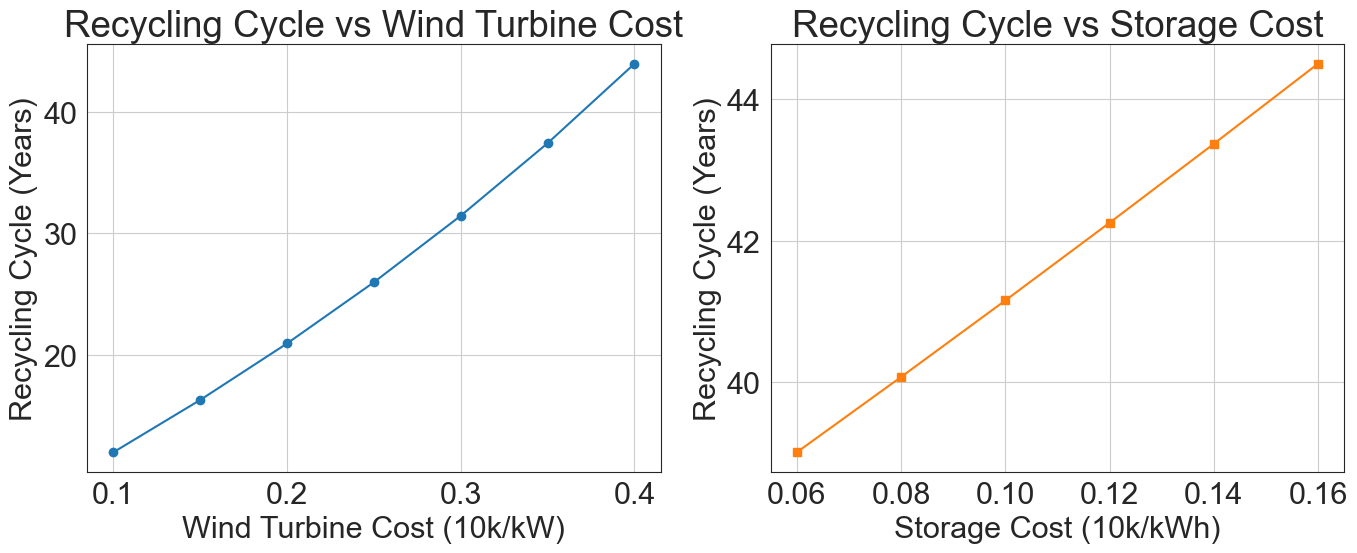

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Base data
wind_cost_options = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]  # Wind turbine costs in 10k yuan per kW
storage_cost_per_kwh_options = [0.16, 0.14, 0.12, 0.10, 0.08, 0.06]  # Energy storage cost in 10k yuan per kWh
price_per_kwh = 1  # Electricity price (yuan per kWh)
maintenance_rate = 0.01  # Annual maintenance cost rate (1% of initial investment)
facility_life_span = 20  # Facility lifespan in years

# Power generation potential per unit area (e.g., kWh/year per kW installed)
areas = {'USA': {'Wind': 151.43}}

# Fixed parameters for analysis
wind_power_fixed = 10  # Fixed wind power capacity: 10 kW
percentage_fixed = 1.0  # Fixed energy storage capacity as 100% of daily production
storage_cost_fixed = 0.15  # Fixed storage cost: 0.15 (10k yuan/kWh)
wind_cost_fixed = 0.4  # Fixed wind turbine cost: 0.4 (10k yuan/kW)

# Function to calculate payback period (recovery cycle)
def calc_recovery_cycle(wind_cost, storage_cost, wind_power, percentage):
    annual_production = wind_power * areas['USA']['Wind']  # kWh/year
    daily_production = annual_production / 365  # kWh/day
    storage_capacity = daily_production * percentage  # Required storage capacity (kWh)
    
    # Total initial investment (in 10k yuan)
    initial_cost = wind_power * wind_cost + storage_capacity * storage_cost
    
    # Annual revenue from electricity sales (converted from yuan to 10k yuan)
    annual_revenue = (annual_production * price_per_kwh) / 10000
    
    # Annual maintenance cost (as a percentage of initial cost)
    annual_maintenance_cost = initial_cost * maintenance_rate
    
    # Net annual benefit
    annual_benefit = annual_revenue - annual_maintenance_cost
    
    # Payback period (recovery cycle)
    recovery_cycle = initial_cost / annual_benefit if annual_benefit > 0 else float('inf')
    return recovery_cycle

# Calculate data for the first plot: recovery cycle vs. wind turbine cost
recovery_cycles_wind = []
for wind_cost in wind_cost_options:
    rc = calc_recovery_cycle(wind_cost, storage_cost_fixed, wind_power_fixed, percentage_fixed)
    recovery_cycles_wind.append(rc)

# Calculate data for the second plot: recovery cycle vs. energy storage cost
recovery_cycles_storage = []
for storage_cost in storage_cost_per_kwh_options:
    rc = calc_recovery_cycle(wind_cost_fixed, storage_cost, wind_power_fixed, percentage_fixed)
    recovery_cycles_storage.append(rc)

# Plot both subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Wind turbine cost vs. recovery cycle
ax1.plot(wind_cost_options, recovery_cycles_wind, marker='o', color='tab:blue')
ax1.set_title("Recovery Cycle vs Wind Turbine Cost")
ax1.set_xlabel("Wind Turbine Cost (10k yuan/kW)")
ax1.set_ylabel("Recovery Cycle (Years)")
ax1.grid(True)

# Plot 2: Storage cost vs. recovery cycle
ax2.plot(storage_cost_per_kwh_options, recovery_cycles_storage, marker='s', color='tab:orange')
ax2.set_title("Recovery Cycle vs Storage Cost")
ax2.set_xlabel("Storage Cost (10k yuan/kWh)")
ax2.set_ylabel("Recovery Cycle (Years)")
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


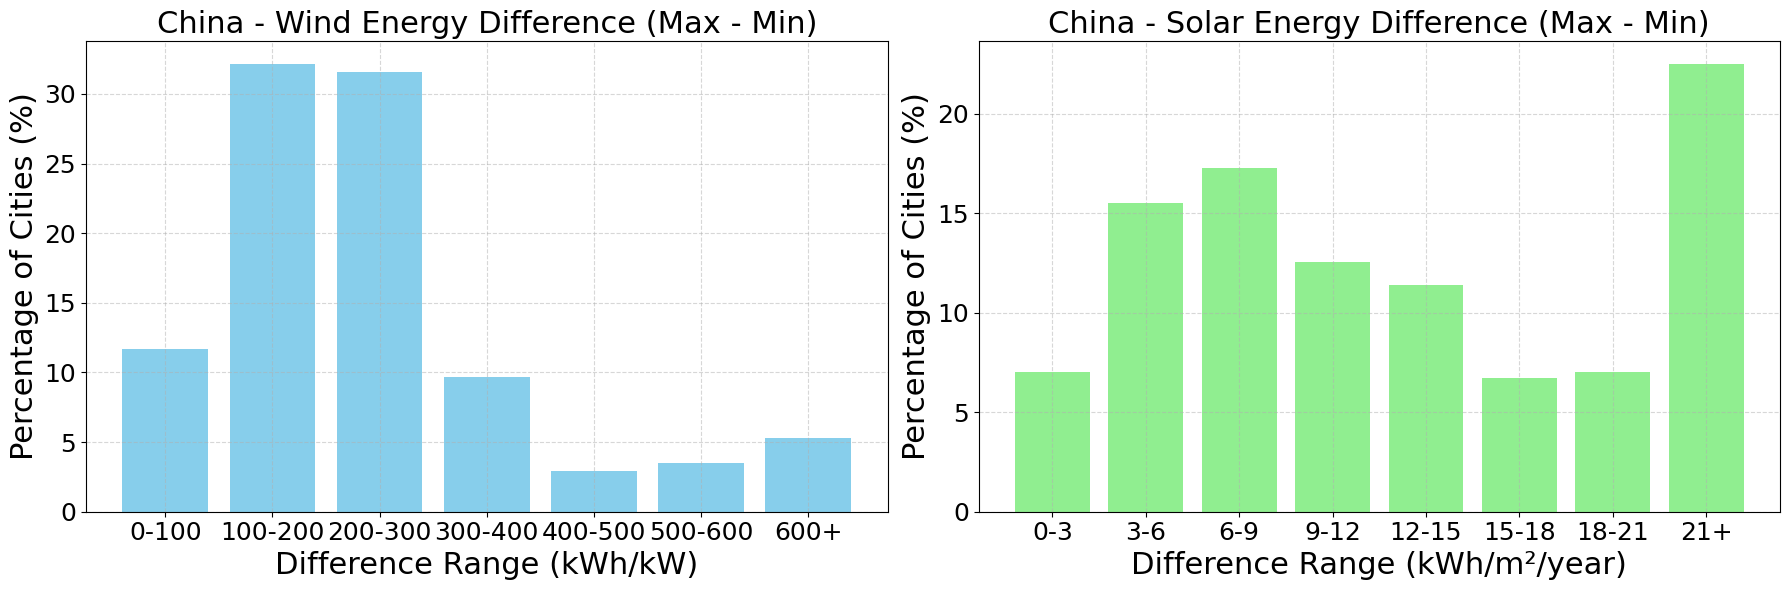

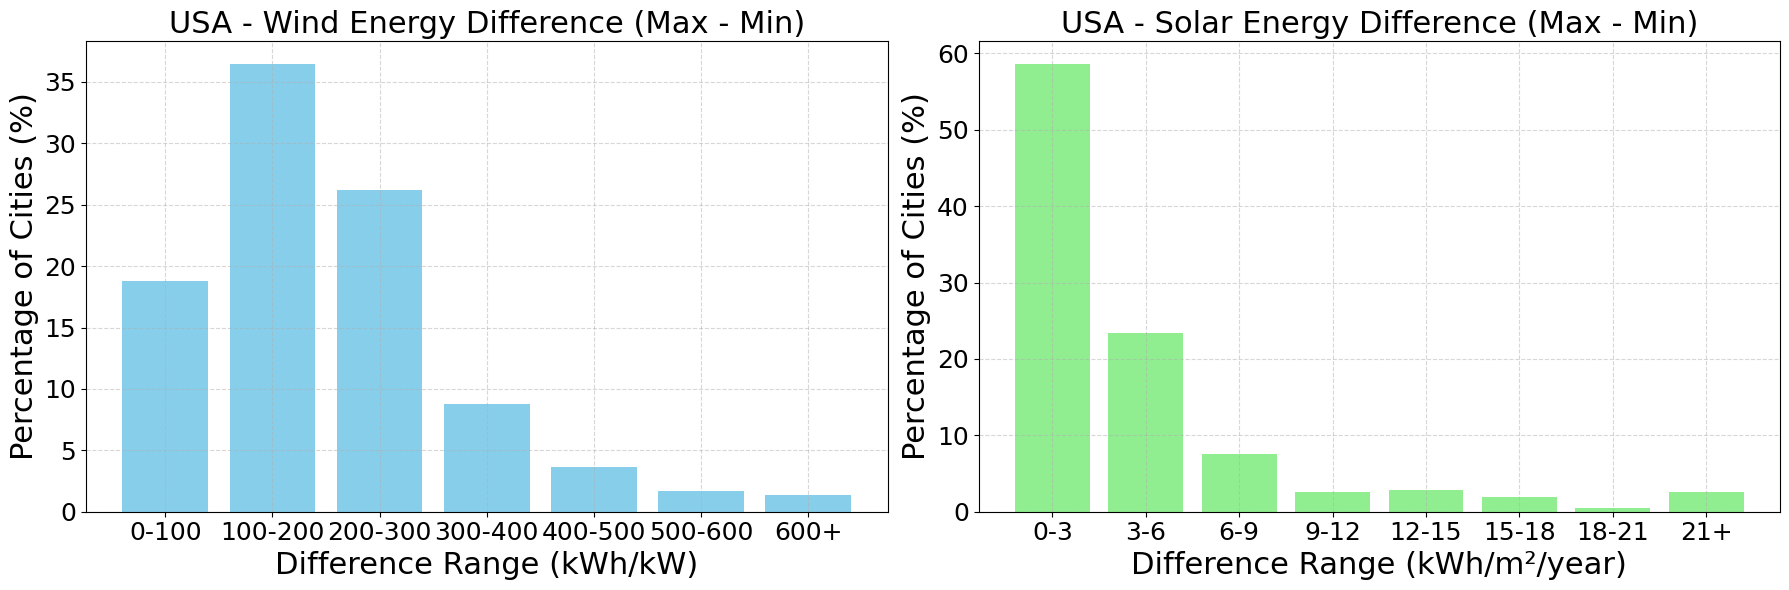

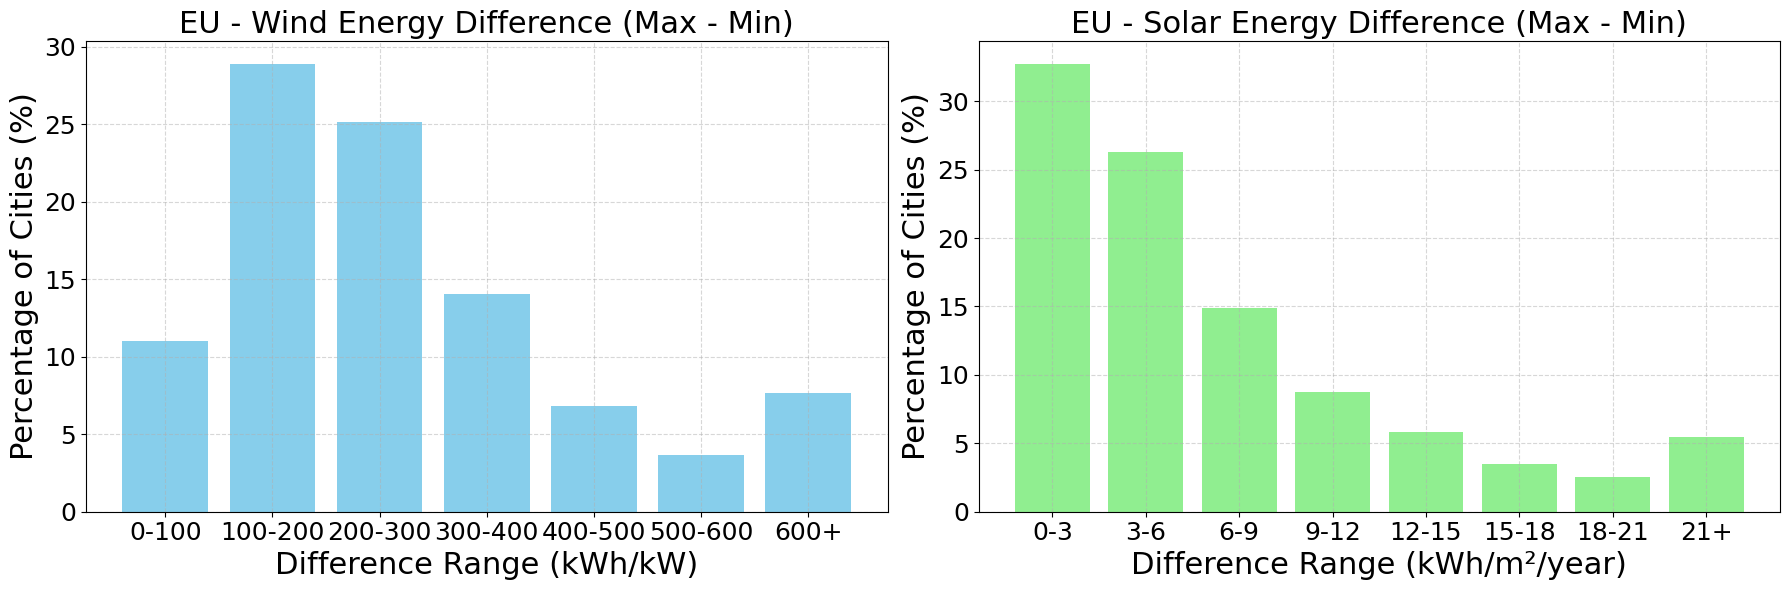

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data_file_path = 'global_city_renewable_energy_potential.csv'
df = pd.read_csv(data_file_path)

# Ensure required columns are present
assert 'Wind_Energy_Max' in df.columns and 'Wind_Energy_Min' in df.columns, "Wind energy columns missing"
assert 'PV_Energy_Max' in df.columns and 'PV_Energy_Min' in df.columns, "PV energy columns missing"

# Calculate the difference between maximum and minimum values
df['Wind_Diff'] = df['Wind_Energy_Max'] - df['Wind_Energy_Min']
df['PV_Diff'] = df['PV_Energy_Max'] - df['PV_Energy_Min']

# Define bin edges for wind energy difference
wind_bins = [0, 100, 200, 300, 400, 500, 600, float('inf')]
wind_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600+']

# Define bin edges for PV energy difference
pv_bins = [0, 3, 6, 9, 12, 15, 18, 21, float('inf')]
pv_labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21+']

# Categorize differences into bins
df['Wind_Bin'] = pd.cut(df['Wind_Diff'], bins=wind_bins, labels=wind_labels, right=False)
df['PV_Bin'] = pd.cut(df['PV_Diff'], bins=pv_bins, labels=pv_labels, right=False)

# Group by region and create plots
regions = df['Region'].unique()

# Create a figure for each region: two subplots (wind and PV), one per region
for region in regions:
    region_df = df[df['Region'] == region]
    
    # Count distribution of wind and PV differences and convert to percentages
    wind_counts = region_df['Wind_Bin'].value_counts().reindex(wind_labels, fill_value=0)
    pv_counts = region_df['PV_Bin'].value_counts().reindex(pv_labels, fill_value=0)

    wind_percent = wind_counts / len(region_df) * 100
    pv_percent = pv_counts / len(region_df) * 100

    # Set up the plotting area
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Wind energy difference distribution
    axes[0].bar(wind_percent.index, wind_percent.values, color='skyblue')
    axes[0].set_title(f'{region} - Wind Energy Difference (Max - Min)', fontsize=22)
    axes[0].set_xlabel('Difference Range (kWh/kW)', fontsize=22)
    axes[0].set_ylabel('Percentage of Cities (%)', fontsize=22)
    axes[0].tick_params(axis='both', which='major', labelsize=18)
    axes[0].grid(True, linestyle='--', alpha=0.5)

    # Solar (PV) energy difference distribution
    axes[1].bar(pv_percent.index, pv_percent.values, color='lightgreen')
    axes[1].set_title(f'{region} - Solar Energy Difference (Max - Min)', fontsize=22)
    axes[1].set_xlabel('Difference Range (kWh/m²/year)', fontsize=22)
    axes[1].set_ylabel('Percentage of Cities (%)', fontsize=22)
    axes[1].tick_params(axis='both', which='major', labelsize=18)
    axes[1].grid(True, linestyle='--', alpha=0.5)

    # Automatically adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# Read the raw data
data_file_path = 'global_city_renewable_energy_potential.csv'
df = pd.read_csv(data_file_path)

# Ensure required columns are present
assert 'Wind_Energy_Max' in df.columns and 'Wind_Energy_Min' in df.columns, "Wind energy columns missing"
assert 'PV_Energy_Max' in df.columns and 'PV_Energy_Min' in df.columns, "PV energy columns missing"

# Installed capacity
wind_capacity_kw = 10    # Wind power: 10 kW installed
pv_area_m2 = 50          # Solar PV: 50 m² installed

# Unit conversion (from kWh/kW/year to total kWh/year)
df['Wind_Energy_Max_kWh'] = df['Wind_Energy_Max'] * wind_capacity_kw
df['Wind_Energy_Min_kWh'] = df['Wind_Energy_Min'] * wind_capacity_kw
df['Wind_Diff_kWh'] = df['Wind_Energy_Max_kWh'] - df['Wind_Energy_Min_kWh']

# Unit conversion (from kWh/m²/year to total kWh/year)
df['PV_Energy_Max_kWh'] = df['PV_Energy_Max'] * pv_area_m2
df['PV_Energy_Min_kWh'] = df['PV_Energy_Min'] * pv_area_m2
df['PV_Diff_kWh'] = df['PV_Energy_Max_kWh'] - df['PV_Energy_Min_kWh']

# Total energy difference over 20 years
df['Wind_20Y_Diff'] = df['Wind_Diff_kWh'] * 20
df['PV_20Y_Diff'] = df['PV_Diff_kWh'] * 20

# Ratio of energy difference to minimum generation over 20 years
df['Wind_Diff_Ratio'] = df['Wind_20Y_Diff'] / (df['Wind_Energy_Min_kWh'] * 20)
df['PV_Diff_Ratio'] = df['PV_20Y_Diff'] / (df['PV_Energy_Min_kWh'] * 20)

# Profit difference (electricity price: 1 yuan/kWh)
df['Wind_Profit_Diff'] = df['Wind_20Y_Diff'] * 1  # Unit: yuan
df['PV_Profit_Diff'] = df['PV_20Y_Diff'] * 1      # Unit: yuan

# Investment costs
wind_investment = 46200  # Total wind investment cost (yuan)
pv_investment = 77600    # Total solar PV investment cost (yuan)

# Profit difference as a percentage of total investment
df['Wind_Profit_Ratio'] = df['Wind_Profit_Diff'] / wind_investment
df['PV_Profit_Ratio'] = df['PV_Profit_Diff'] / pv_investment

# Define output column names with descriptions
output_columns = [
    'City', 'Region',
    'Wind_Energy_Max', 'Wind_Energy_Min', 'Wind_Diff_kWh',
    'PV_Energy_Max', 'PV_Energy_Min', 'PV_Diff_kWh',
    'Wind_20Y_Diff', 'PV_20Y_Diff',
    'Wind_Diff_Ratio', 'PV_Diff_Ratio',
    'Wind_Profit_Diff', 'PV_Profit_Diff',
    'Wind_Profit_Ratio', 'PV_Profit_Ratio'
]

# Create output DataFrame
output_df = df[output_columns].copy()

# Save results to CSV file
output_csv_path = 'city_energy_difference_analysis.csv'
output_df.to_csv(output_csv_path, index=False, float_format='%.2f')

print(f"Results saved to: {output_csv_path}")

In [ ]:
import pandas as pd

# Read the input data
input_csv_path = 'city_energy_difference_analysis.csv'
df = pd.read_csv(input_csv_path)

# Filter cities where PV_Profit_Ratio is less than 0.05
low_profit_ratio_df = df[df['PV_Profit_Ratio'] < 0.05]

# Save the filtered data to a new CSV file
output_low_profit_path = 'PV_Profit_Ratio_less_than_0_05.csv'
low_profit_ratio_df.to_csv(output_low_profit_path, index=False)

print(f"Saved cities with PV_Profit_Ratio < 0.05 to: {output_low_profit_path}")

# Group by Region to calculate counts and proportions
regions = ['China', 'EU', 'USA']
result = []

for region in regions:
    total_cities = df[df['Region'] == region].shape[0]
    low_profit_cities = low_profit_ratio_df[low_profit_ratio_df['Region'] == region].shape[0]
    
    # Calculate ratio; handle case where total_cities is zero
    if total_cities > 0:
        ratio = low_profit_cities / total_cities
    else:
        ratio = 0
    
    result.append({
        'Region': region,
        'Total_Cities': total_cities,
        'Low_Profit_Cities': low_profit_cities,
        'Low_Profit_Ratio': round(ratio * 100, 2)  # As percentage, rounded to 2 decimal places
    })

# Convert results to DataFrame and display
region_ratio_df = pd.DataFrame(result)
print("\nProportion of cities with PV_Profit_Ratio < 0.05 by region:")
print(region_ratio_df.to_string(index=False))